In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [15]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [19]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [21]:
df.head(5)

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
df = df.drop(columns=['instant', 'dteday', 'year'])

In [23]:
cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

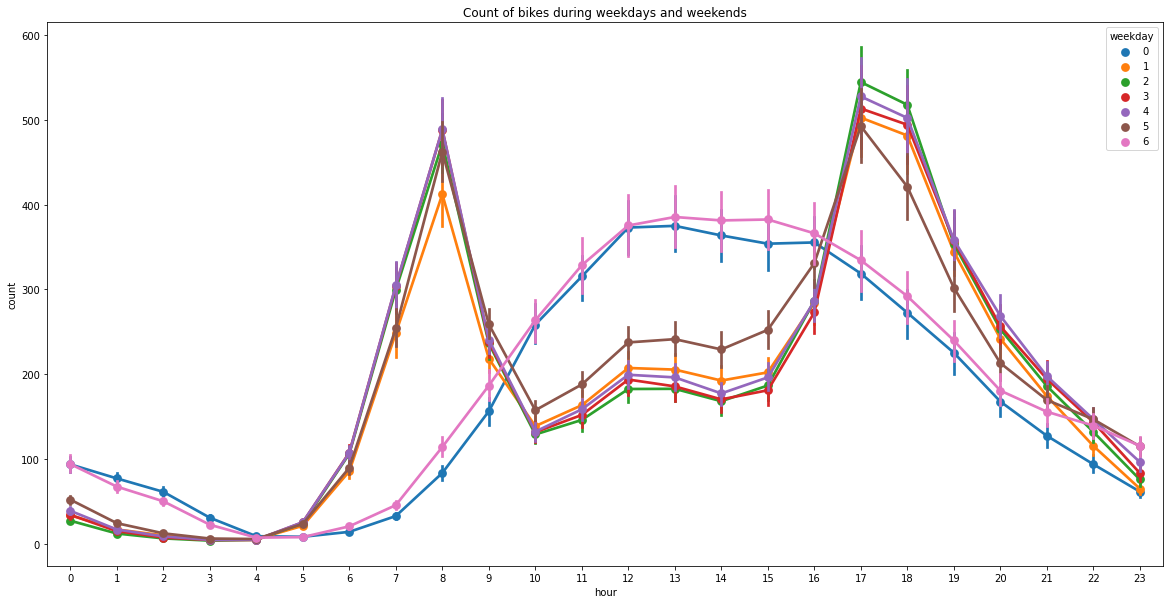

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

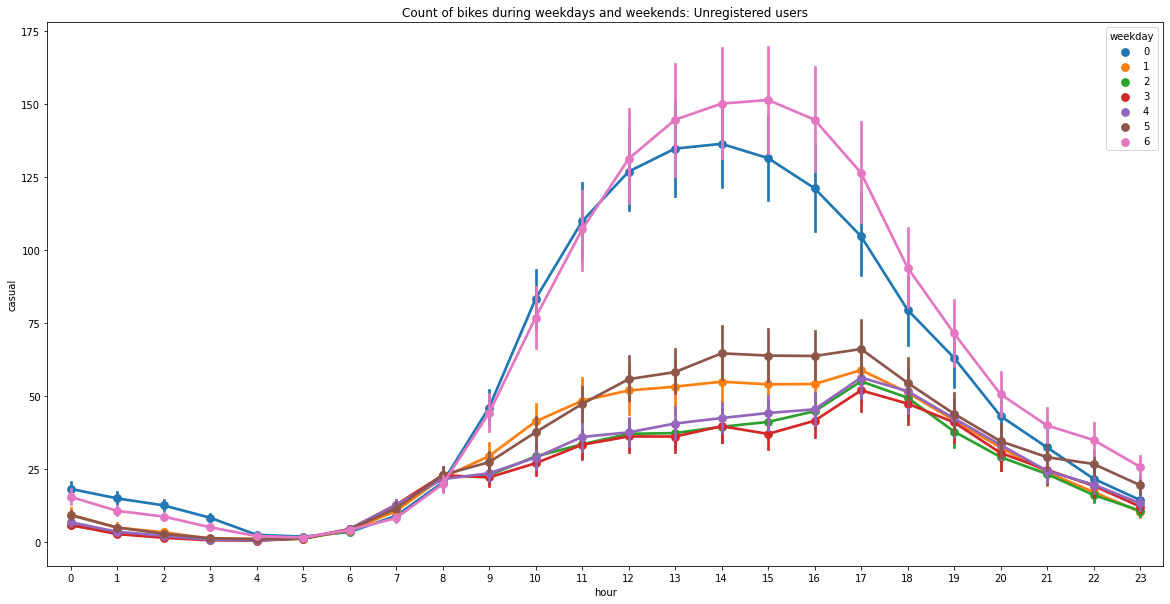

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

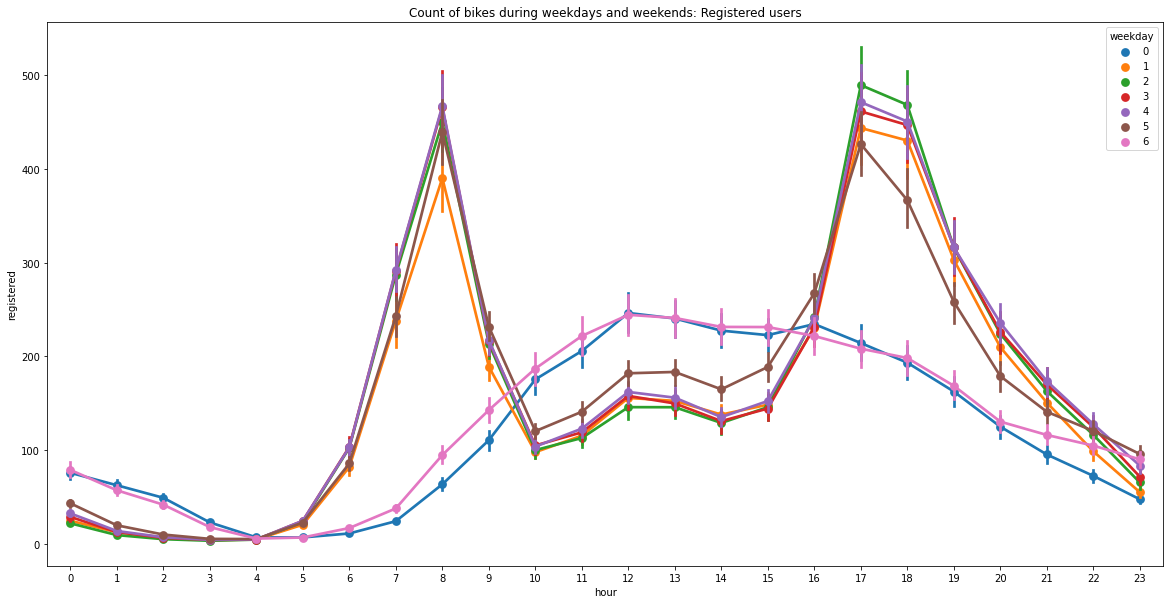

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

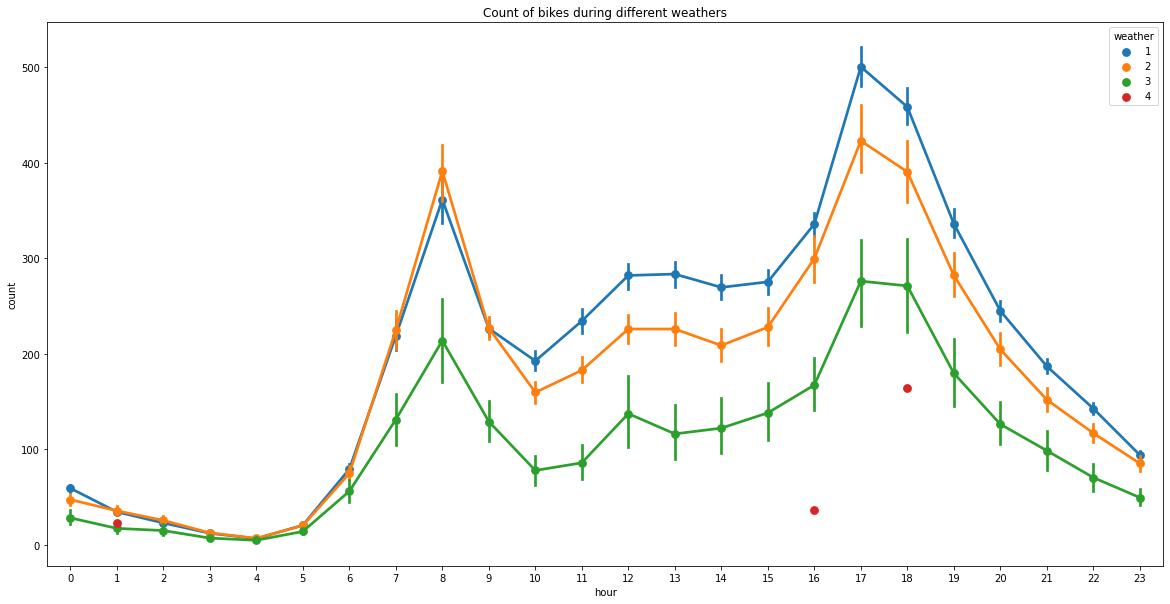

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

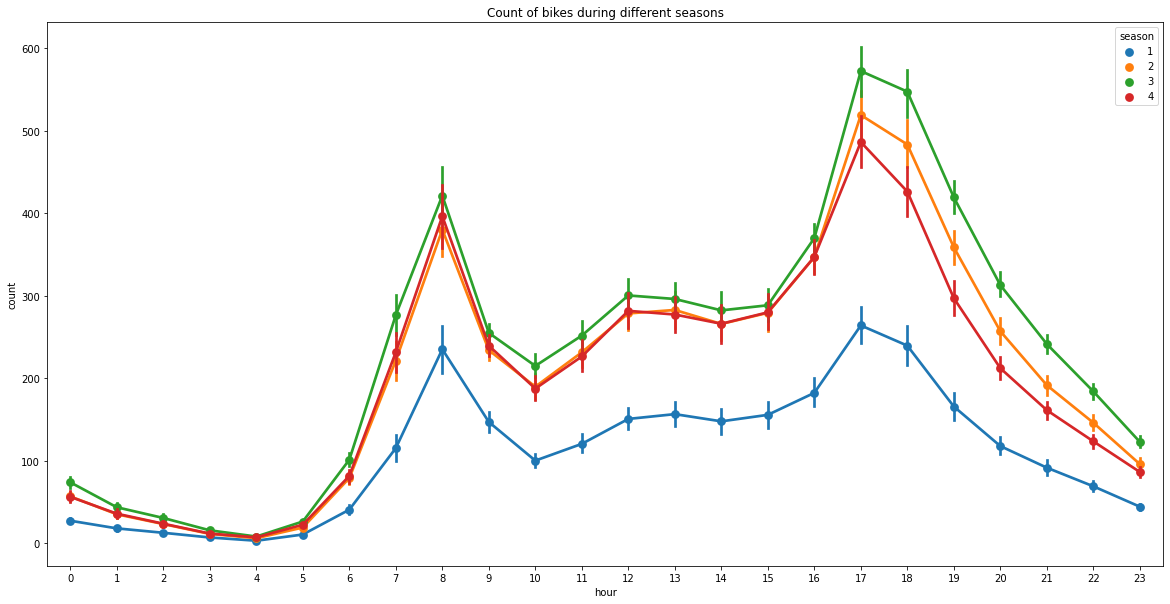

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

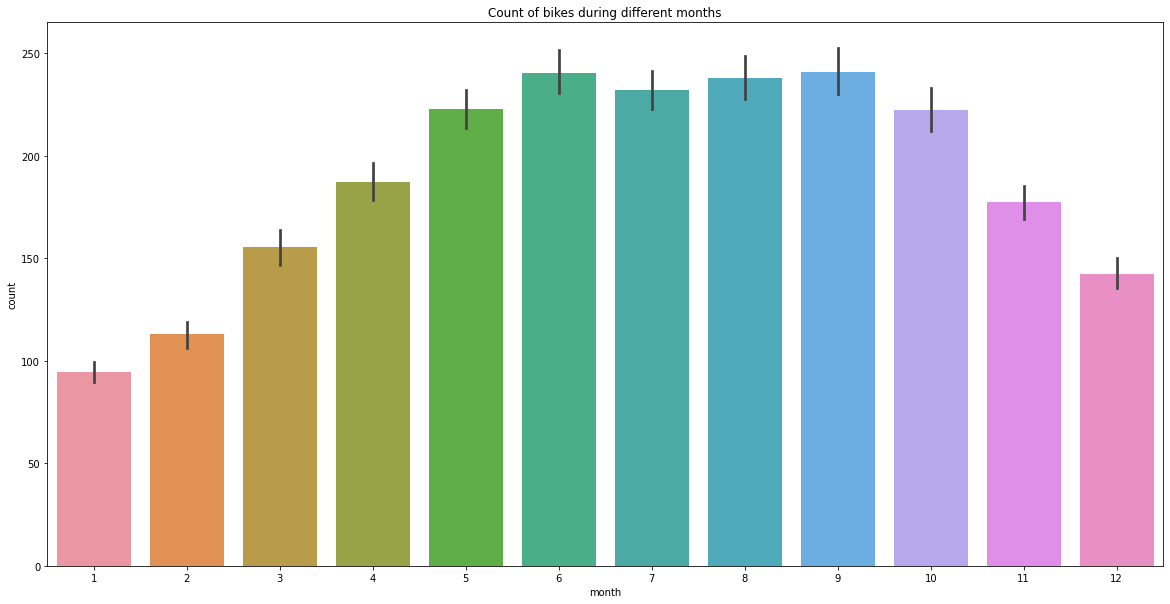

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

In [30]:
df['count'] = np.log(df['count'])

<Axes: >

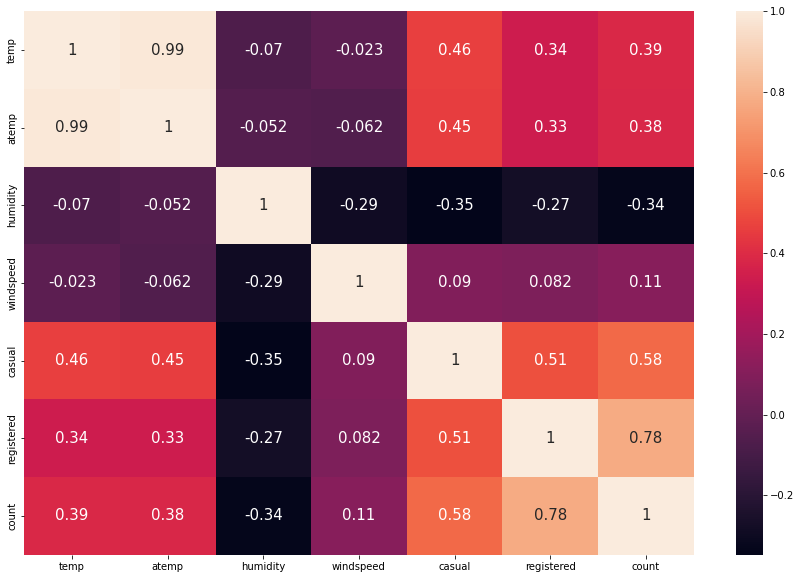

In [31]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

In [32]:
pd.get_dummies(df['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [33]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

**Linear Regression**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
print("Linear Regression:")
print("MSE: ", mean_squared_error(y_test, y_pred_linear))
print("R-squared: ", r2_score(y_test, y_pred_linear))
print("\n")

Linear Regression:
MSE:  0.45750200786334094
R-squared:  0.7935305028116005




**Ridge Regression**

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ridge regression model
ridge = Ridge()

# Define the grid of hyperparameters to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(ridge, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best model to make predictions on the test set
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)

# Evaluate the performance of the model using mean squared error and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Mean squared error:", mse)
print("R2 score:", r2)


Best hyperparameters: {'alpha': 1.0}
Mean squared error: 0.44900162618725564
R2 score: 0.7924302124496148


**Lasso Regression**

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Lasso regression model
lasso = Lasso()

# Define the grid of hyperparameters to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best model to make predictions on the test set
best_lasso = grid_search.best_estimator_
y_pred = best_lasso.predict(X_test)

# Evaluate the performance of the model using mean squared error and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Mean squared error:", mse)
print("R2 score:", r2)


Best hyperparameters: {'alpha': 0.001}
Mean squared error: 0.45119360123725516
R2 score: 0.7914168802723848


**Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree regression model
tree = DecisionTreeRegressor()

# Define the grid of hyperparameters to search over
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 2, 4, 8, 16]}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best model to make predictions on the test set
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

# Evaluate the performance of the model using mean squared error and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Mean squared error:", mse)
print("R2 score:", r2)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 2}
Mean squared error: 0.4965169450953291
R2 score: 0.7704642682839151


**Random Forest**

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 2, 4, 8, 16]}

# Create a random forest regression model
rf = RandomForestRegressor(random_state=42)

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Make predictions on the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model using R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2}")


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 200}
R2 score: 0.8035231679442474


In [51]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.42500605768428246


**SVR**

In [53]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Training Score: {:.2f}".format(grid_search.best_score_))

# Predict on test set and evaluate the model
y_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: {:.2f}".format(mse))
print("R2 Score: {:.2f}".format(r2))


Best Hyperparameters:  {'C': 1, 'epsilon': 0.1, 'gamma': 'auto'}
Training Score: 0.91
MSE: 0.18
R2 Score: 0.92


**Neural Network**

In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Set early stopping criteria to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test), callbacks=[early_stop])


Epoch 1/50
435/435 [==============================] - 2s 3ms/step - loss: 2.5392 - val_loss: 0.4520
Epoch 2/50
435/435 [==============================] - 2s 3ms/step - loss: 0.3720 - val_loss: 0.2868
Epoch 3/50
435/435 [==============================] - 4s 9ms/step - loss: 0.2518 - val_loss: 0.2276
Epoch 4/50
435/435 [==============================] - 2s 4ms/step - loss: 0.2205 - val_loss: 0.2155
Epoch 5/50
435/435 [==============================] - 2s 4ms/step - loss: 0.2064 - val_loss: 0.2107
Epoch 6/50
435/435 [==============================] - 2s 5ms/step - loss: 0.1976 - val_loss: 0.2049
Epoch 7/50
435/435 [==============================] - 2s 4ms/step - loss: 0.1891 - val_loss: 0.1975
Epoch 8/50
435/435 [==============================] - 2s 5ms/step - loss: 0.1859 - val_loss: 0.2006
Epoch 9/50
435/435 [==============================] - 1s 3ms/step - loss: 0.1807 - val_loss: 0.2182
Epoch 10/50
435/435 [==============================] - 1s 3ms/step - loss: 0.1751 - val_loss: 0.1921

In [56]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

109/109 [==============================] - 0s 1ms/step
Mean squared error: 0.18088379532141455
R2 score: 0.9163788975888589
